# **Milestone 1** #

## Problem Definition ##

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

### **Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [2]:
filepath = r'/Users/kylelacson/Documents/Coding/Great_Learning/Course Work /Projects/Capstone/Classification Capstone/hmeq.csv'

### **Read the dataset**

In [3]:
df = pd.read_csv(filepath)

In [4]:
# Copying data to another variable to avoid any changes to original data
df_copy = df.copy(deep = True)

### **Print the first and last 5 rows of the dataset**

In [5]:
# Display first five rows
# Remove ___________ and complete the code
df_copy.head(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [6]:
# Display last 5 rows
# Remove ___________ and complete the code
df_copy.tail(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### **Understand the shape of the dataset**

In [7]:
# Check the shape of the data
# Remove ___________ and complete the code
df_copy.shape

(5960, 13)

**Insights ________**

-This dataset is contains about 5960 entries/samples with 13 distinct features

-From checking the first 5 entries within the dataset, there are null entries within the set

-The BAD and NINQ columns seems to have a binary classification for its entries (0 and 1)

### **Check the data types of the columns**

In [8]:
# Check info of the data
# Remove ___________ and complete the code
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights ______________**

-We can confrim that there are 5960 entires within this data set with different data types

-The three different data types within this dataset are intergers, floats, and objects

-There seems to be quite a few null entires in most of the columns

### **Check for missing values**

In [9]:
# Analyse missing values - Hint: use isnull() function
# Remove ___________ and complete the code
df_copy.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [10]:
# Check the percentage of missing values in the each column.
# Hint: divide the result from the previous code by the number of rows in the dataset
# Remove ___________ and complete the code

print('Percentage of missing values in each column:')
print('-------------------------------------------')
for col in df_copy.columns:
    print(f'{col}' + ' : ' + f'{round(df_copy[col].isnull().sum()*100/df_copy.shape[0],2)}' + '%')

Percentage of missing values in each column:
-------------------------------------------
BAD : 0.0%
LOAN : 0.0%
MORTDUE : 8.69%
VALUE : 1.88%
REASON : 4.23%
JOB : 4.68%
YOJ : 8.64%
DEROG : 11.88%
DELINQ : 9.73%
CLAGE : 5.17%
NINQ : 8.56%
CLNO : 3.72%
DEBTINC : 21.26%


**Insights ________**

-11 out of the 13 columns are missing quite a few values with the DEBTINC columns containing the most null entries

-This could because it requires information from other columns which means that the number of missing entires will increase substntially

-The only columns with no missing values are the BAD and LOAN columns

-Good to see that our target features contain no missing values

### **Think about it:**
- We found the total number of missing values and the percentage of missing values, which is better to consider?
- What can be the limit for % missing values in a column in order to avoid it and what are the challenges associated with filling them and avoiding them? 

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [11]:
cols = df_copy.select_dtypes(['object']).columns.tolist()
cols1 = df.select_dtypes(['object']).columns.tolist()
#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')
cols1.append('BAD')

In [12]:
cols #category
cols1 #original object

['REASON', 'JOB', 'BAD']

In [13]:
for i in cols1:
    df[i] = df[i].astype('object')

In [14]:
# Changing the data type of object type column to category. hint use astype() function
# remove ___________ and complete the code

for i in cols:
    df_copy[i] = df_copy[i].astype('category')

In [15]:
# Checking the info again and the datatype of different variable
# remove ___________ and complete the code

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyze Summary Statistics of the dataset**

In [16]:
# Analyze the summary statistics for numerical variables
# Remove ___________ and complete the code

df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


**Insights ______________**

-The initial loan amount comes out to around ~20k

-The mortgage due averages just under 80k, the range varies wildly 

-The mean average loan is a lot lower than the value mortgage due

-The years at the job is right skewed, the majority of the loaners are much newer at there jobs then those who have stayed reflecting a younger overall market

-The number of derogatory remakrs is quite low which will be probably be useful in determining auto loan defaults

-The number of recent credit inquiries is low comparativley to anyt existing credit lines

-Most of the the people who are borrowing loans owe approx 35x the amount their monthly gross which is mildly concerning

In [17]:
# Check summary for categorical data - Hint: inside describe function you can use the argument include=['category']
# Remove ___________ and complete the code

df_copy.describe(include = 'category').T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


**Insights _____________**

-The majority of clients were able to repay their loans

-There is a slight shift in reason towards consolidating loan to pay off existing loan 

-Need more information regarding 'other' employment types as it is very general

**Let's look at the unique values in all the categorical variables**

In [18]:
# Checking the count of unique values in each categorical column 
# Remove ___________ and complete the code

cols_cat= df_copy.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Number of unique values in',i, 'are :')
    print(df_copy[i].nunique())
    print('*'*40)

Number of unique values in BAD are :
2
****************************************
Number of unique values in REASON are :
2
****************************************
Number of unique values in JOB are :
6
****************************************


**Insights _____________**

-'BAD' and 'REASON' columns are binary type columns where there is a binary decision outcome

-The type of 'JOB' have multiple unique values to chosoe from, further investigation is necessary

### **Think about it**
- The results above gave the absolute count of unique values in each categorical column. Are absolute values a good measure? 
- If not, what else can be used? Try implementing that. 

In [19]:
for column in cols_cat.columns:
    print(f'The unique values in {column} are: \n {df_copy[column].unique()}')
    print('-'*60)

The unique values in BAD are: 
 [1, 0]
Categories (2, int64): [0, 1]
------------------------------------------------------------
The unique values in REASON are: 
 ['HomeImp', NaN, 'DebtCon']
Categories (2, object): ['DebtCon', 'HomeImp']
------------------------------------------------------------
The unique values in JOB are: 
 ['Other', NaN, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self']
Categories (6, object): ['Mgr', 'Office', 'Other', 'ProfExe', 'Sales', 'Self']
------------------------------------------------------------


## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [20]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(12,7), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

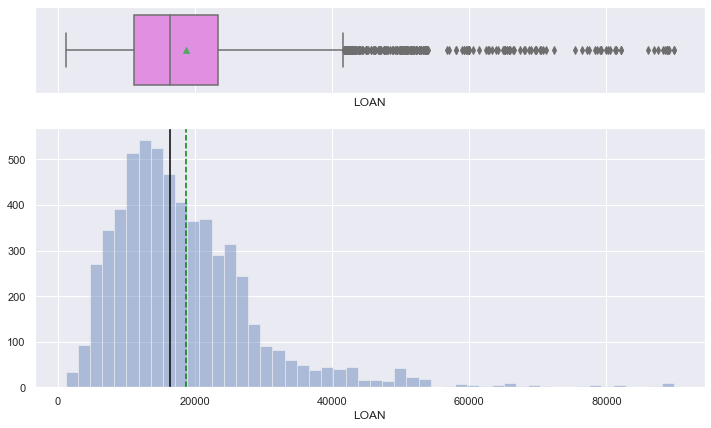

In [21]:
# Build the histogram boxplot for Loan
histogram_boxplot(df_copy['LOAN'])

**Insights __________**

-The LOAN column is right skewed

-The majority of data is clustered near loan calues <40k

-Much of the observed outliers are spread past 40k

-The mean and median follow closley

-This data is clear and provides enough information to infer associations 

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

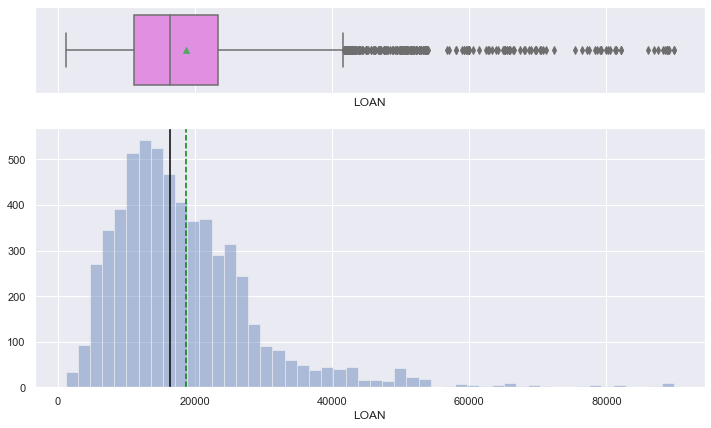

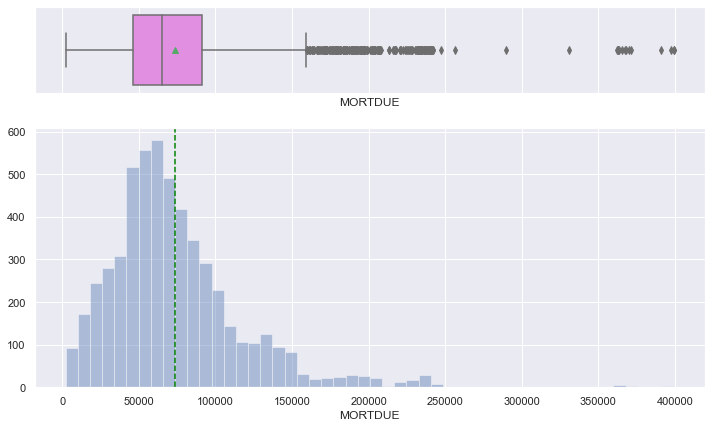

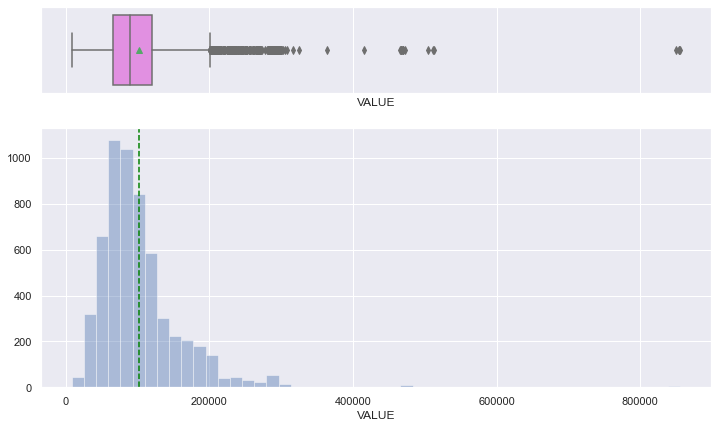

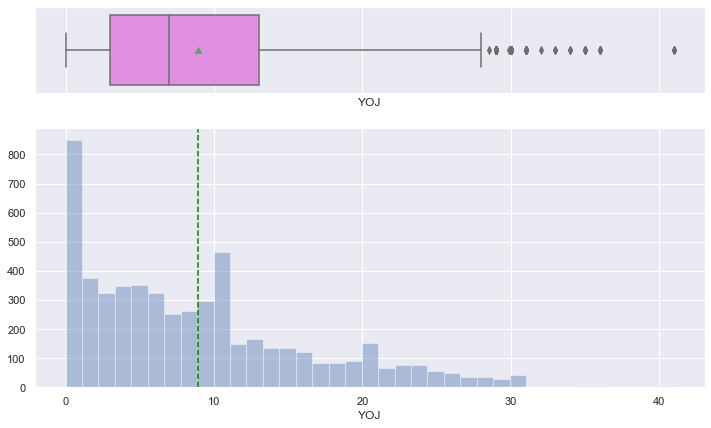

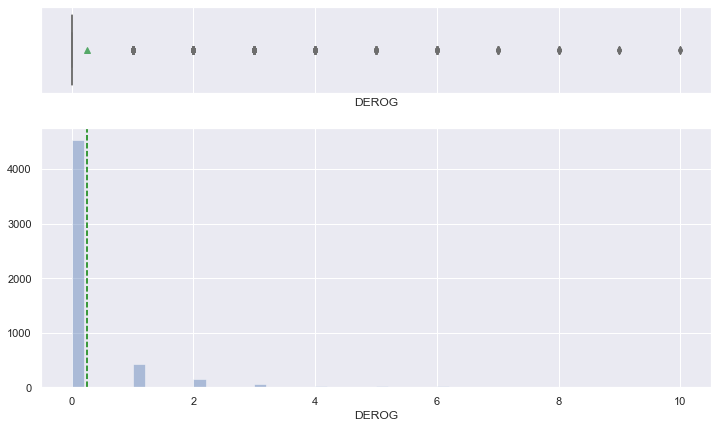

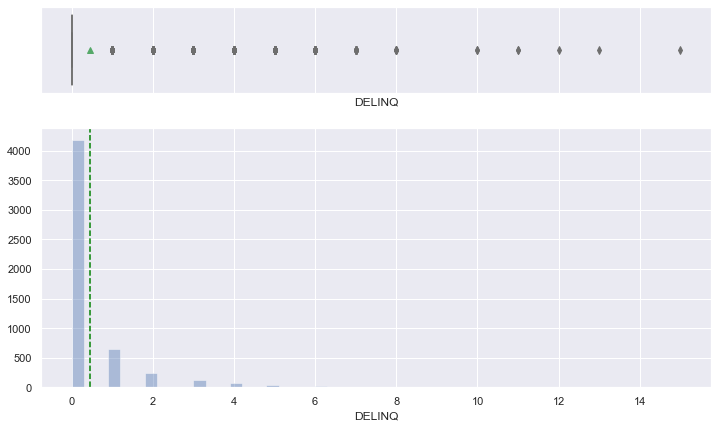

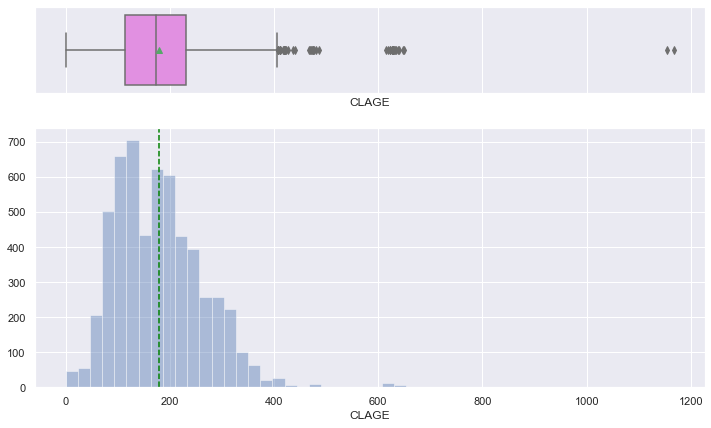

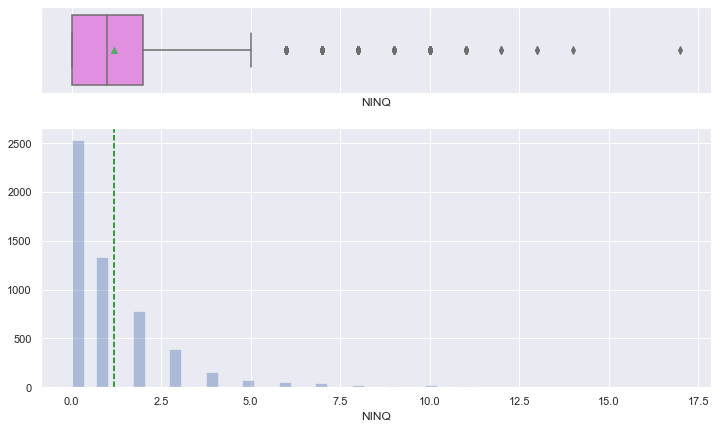

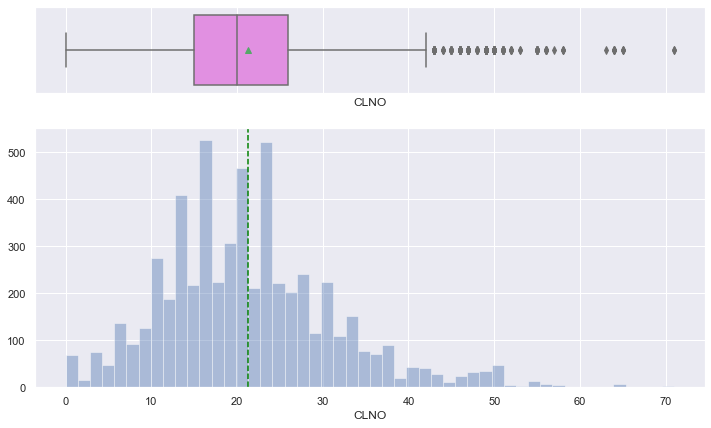

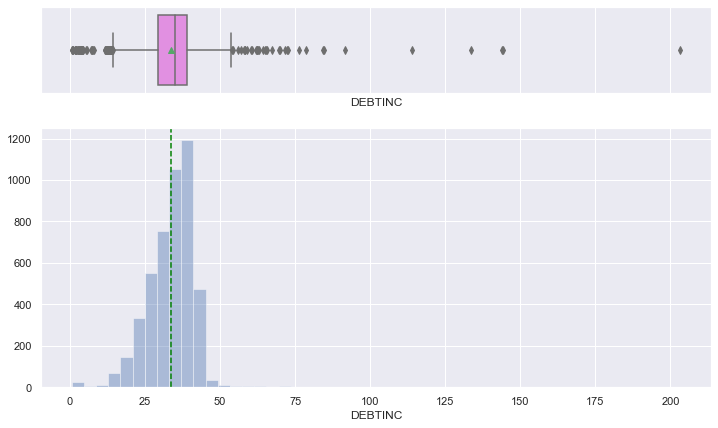

In [22]:
for columns in df_copy.columns:
    if df_copy[columns].dtype == np.int64:
        histogram_boxplot(df_copy[columns])

    elif df_copy[columns].dtype == float:
        histogram_boxplot(df_copy[columns])

    else:
        continue

**Insights ____________**

-The majority of the columns are right skewed

-The mean and median mortgage (MORTDUE) owed is similiar, follows the same skew shape as the LOAN column

-VALUE contain less outliers and have a heavy right skewed shape, concentrated data between 30k to 55k property value

-YOJ is right skewed, outliers are few and seem unlikely 

In [23]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **2. Univariate Analysis - Categorical Data**

In [24]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for DELINQ

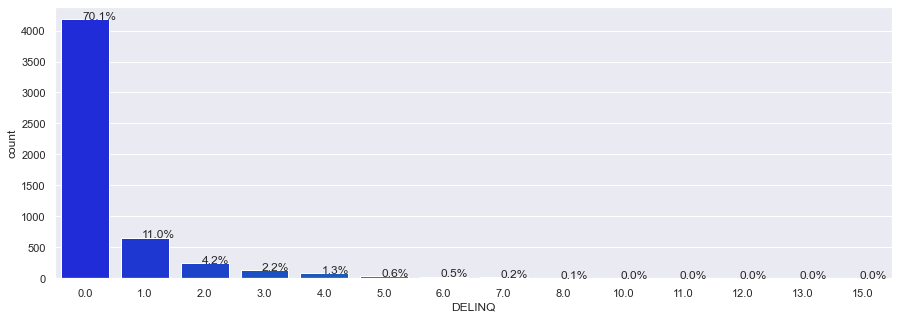

In [25]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(df_copy["DELINQ"],palette='winter')
perc_on_bar(ax,df_copy["DELINQ"])

**Insights ________**

-Over two-thirds of the clinets do not have any deliquent credit lines

-The values on the countplot do not add to 100%, there is missing data somewhere 

-The data may change slightly when filling in and replacing the missing values

#### **Note:** As done above, analyze Histogram and Boxplot for other variables.

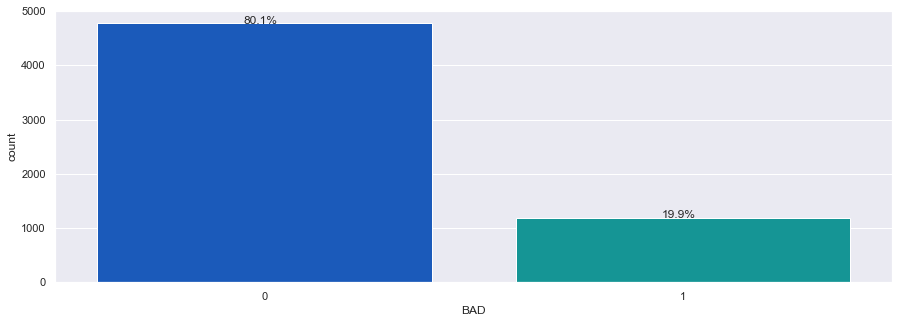

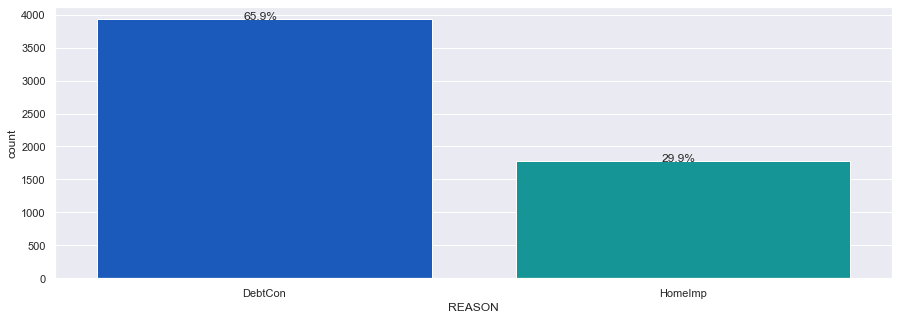

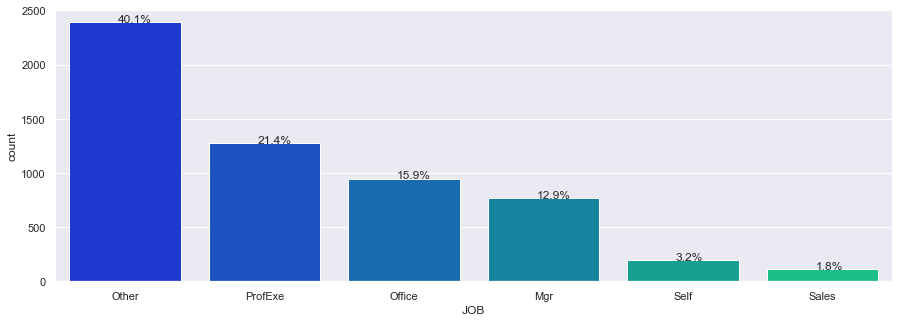

In [26]:
cols_cat.columns
for columns in cols_cat.columns:
    plt.figure(figsize = (15,5))
    ax = sns.countplot(df_copy[columns], palette = 'winter', order = cols_cat[columns].value_counts().index)
    perc_on_bar(ax,df_copy[columns])

**Insights _____________**

-The majority of clients repaying their debt is 1 to 4, (20% of clients default and 80% repay their loan)

-1 to 2 ratio of loans being used for home improvement projects to consolidate the loans

-Majority of clients who are taking loans are buisness, manager and higher level clients, and professionals (need more information on the 'other' unique value


## **Bivariate Analysis**

###**Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

In [27]:
num_col = df_copy.select_dtypes(include = np.number)

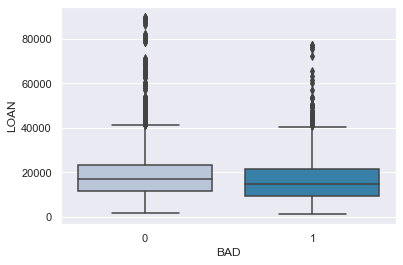

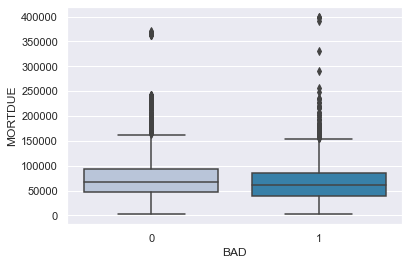

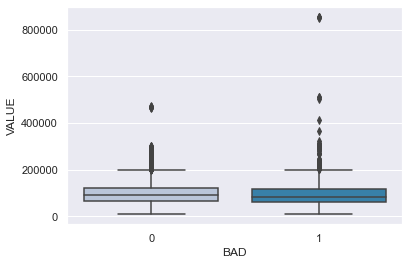

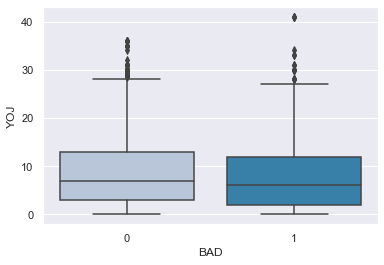

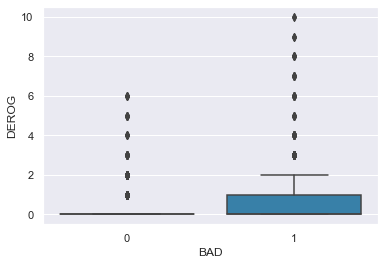

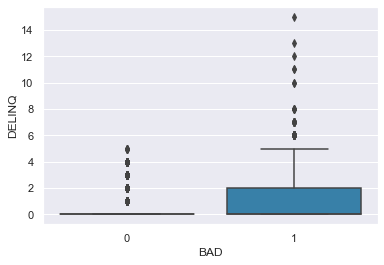

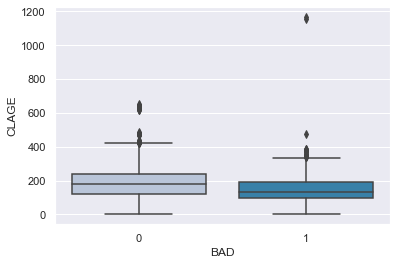

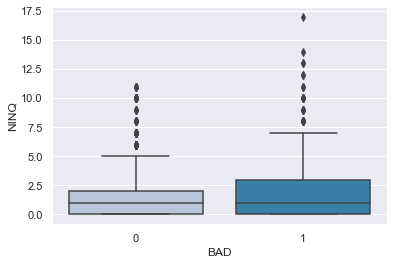

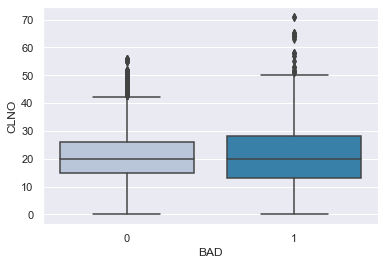

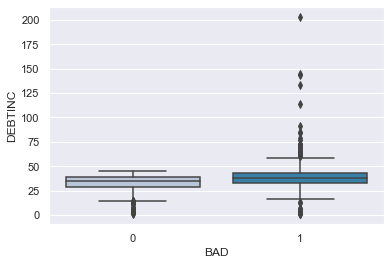

In [28]:
for column in num_col.columns:
    sns.boxplot(df_copy['BAD'],df[column],palette='PuBu')
    plt.show()

**Insights ______**

-Whether said client was able to repay or or defaulted on the loan, there does not seem to be a very clear correlation between loan amount and the 'BAD columns

-While outliers for those who repaid their loan are larger, keep in mind that within the sample, there was a 1:4 ratio of clients repaying their loan versus clients defaulting their loans

-There is a correlation have more deliquent notes with those who defaulted on their loan as shown in the DELINQ and BAD boxplot

-Debt to income ratio also plays a larger role in determining which clients default and which clients do not.

**Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

### **Bivariate Analysis: Two Continuous Variables**

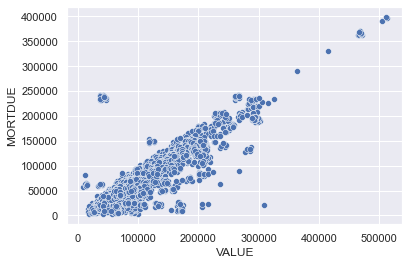

In [29]:
sns.scatterplot(df_copy["VALUE"],df_copy['MORTDUE'],palette="PuBu");

**Insights: _____**

-Positive correlation between the mortgage due and the value of the property which makes sense

-The larger the mortgage is of the property, the larger the value of the property is comparativley

-Clear right skew where the majrotiy of the data gravitates towards the lower house values and mortgage loans

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [30]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df_copy['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df_copy['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


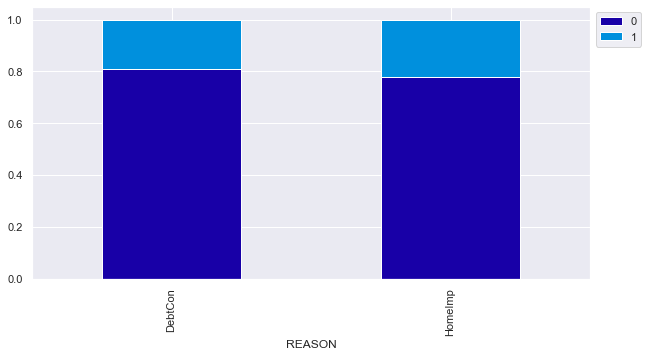

In [31]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(df_copy['REASON'])

**Insights ____________**

-For the two unique values of the column 'REASONS' they seem to be evenly distrubted with respect to the clients who defaulted and those who repaid their loan

-This may be indicative that REASON may not provide any statistical correlation in determining whether some client will end up defaulting or repaying their debt

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


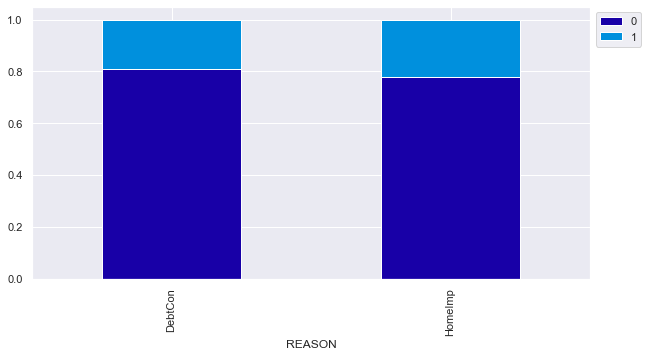

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


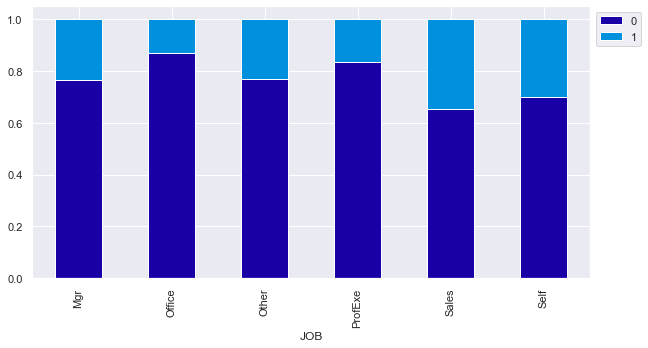

In [32]:
for columns in df_copy.columns:
    if df_copy[columns].dtype == np.int64:
        pass
    elif df_copy[columns].dtype == float:
        pass
    elif df_copy[columns].dtype == bool:
        pass
    elif columns == 'BAD':
        pass
    else:
        stacked_plot(df_copy[columns])

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD

**Insights ___________________**

-For different jobs, each has their own ratio of defaulted and repaying clients

-Office job clients tend to repay their loans more than someone who works in Sales who has the lowest percentage of clients who repay their debt

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

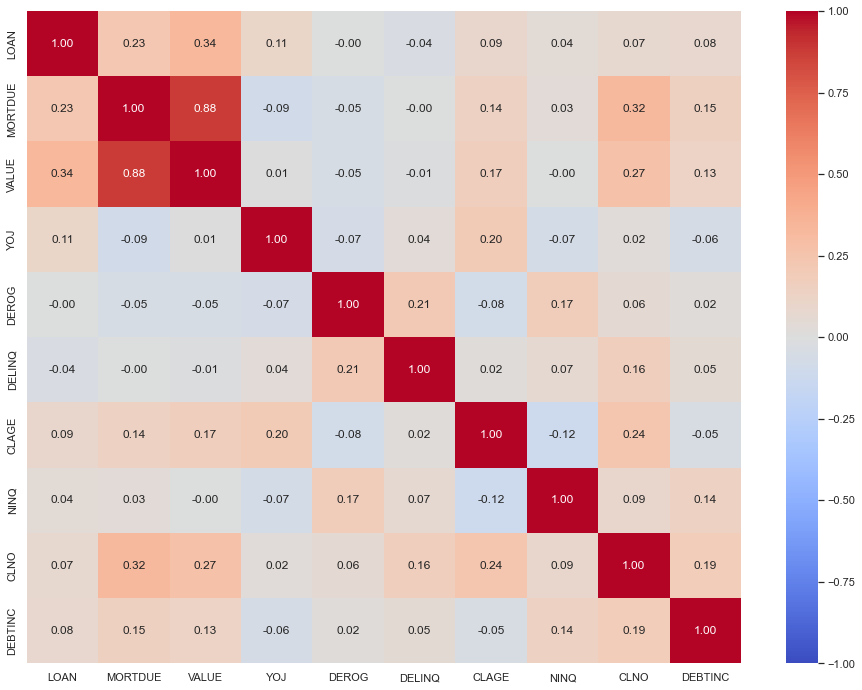

In [33]:
# Separating numerical variables
numerical_col = df_copy.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns
# Remove ___________ and complete the code

corr = df_copy[numerical_col].corr()

# plot the heatmap
# Remove ___________ and complete the code

plt.figure(figsize=(16,12))
sns.heatmap(data = corr, cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f", annot = True,
        xticklabels=corr.columns,
        yticklabels=corr.columns);

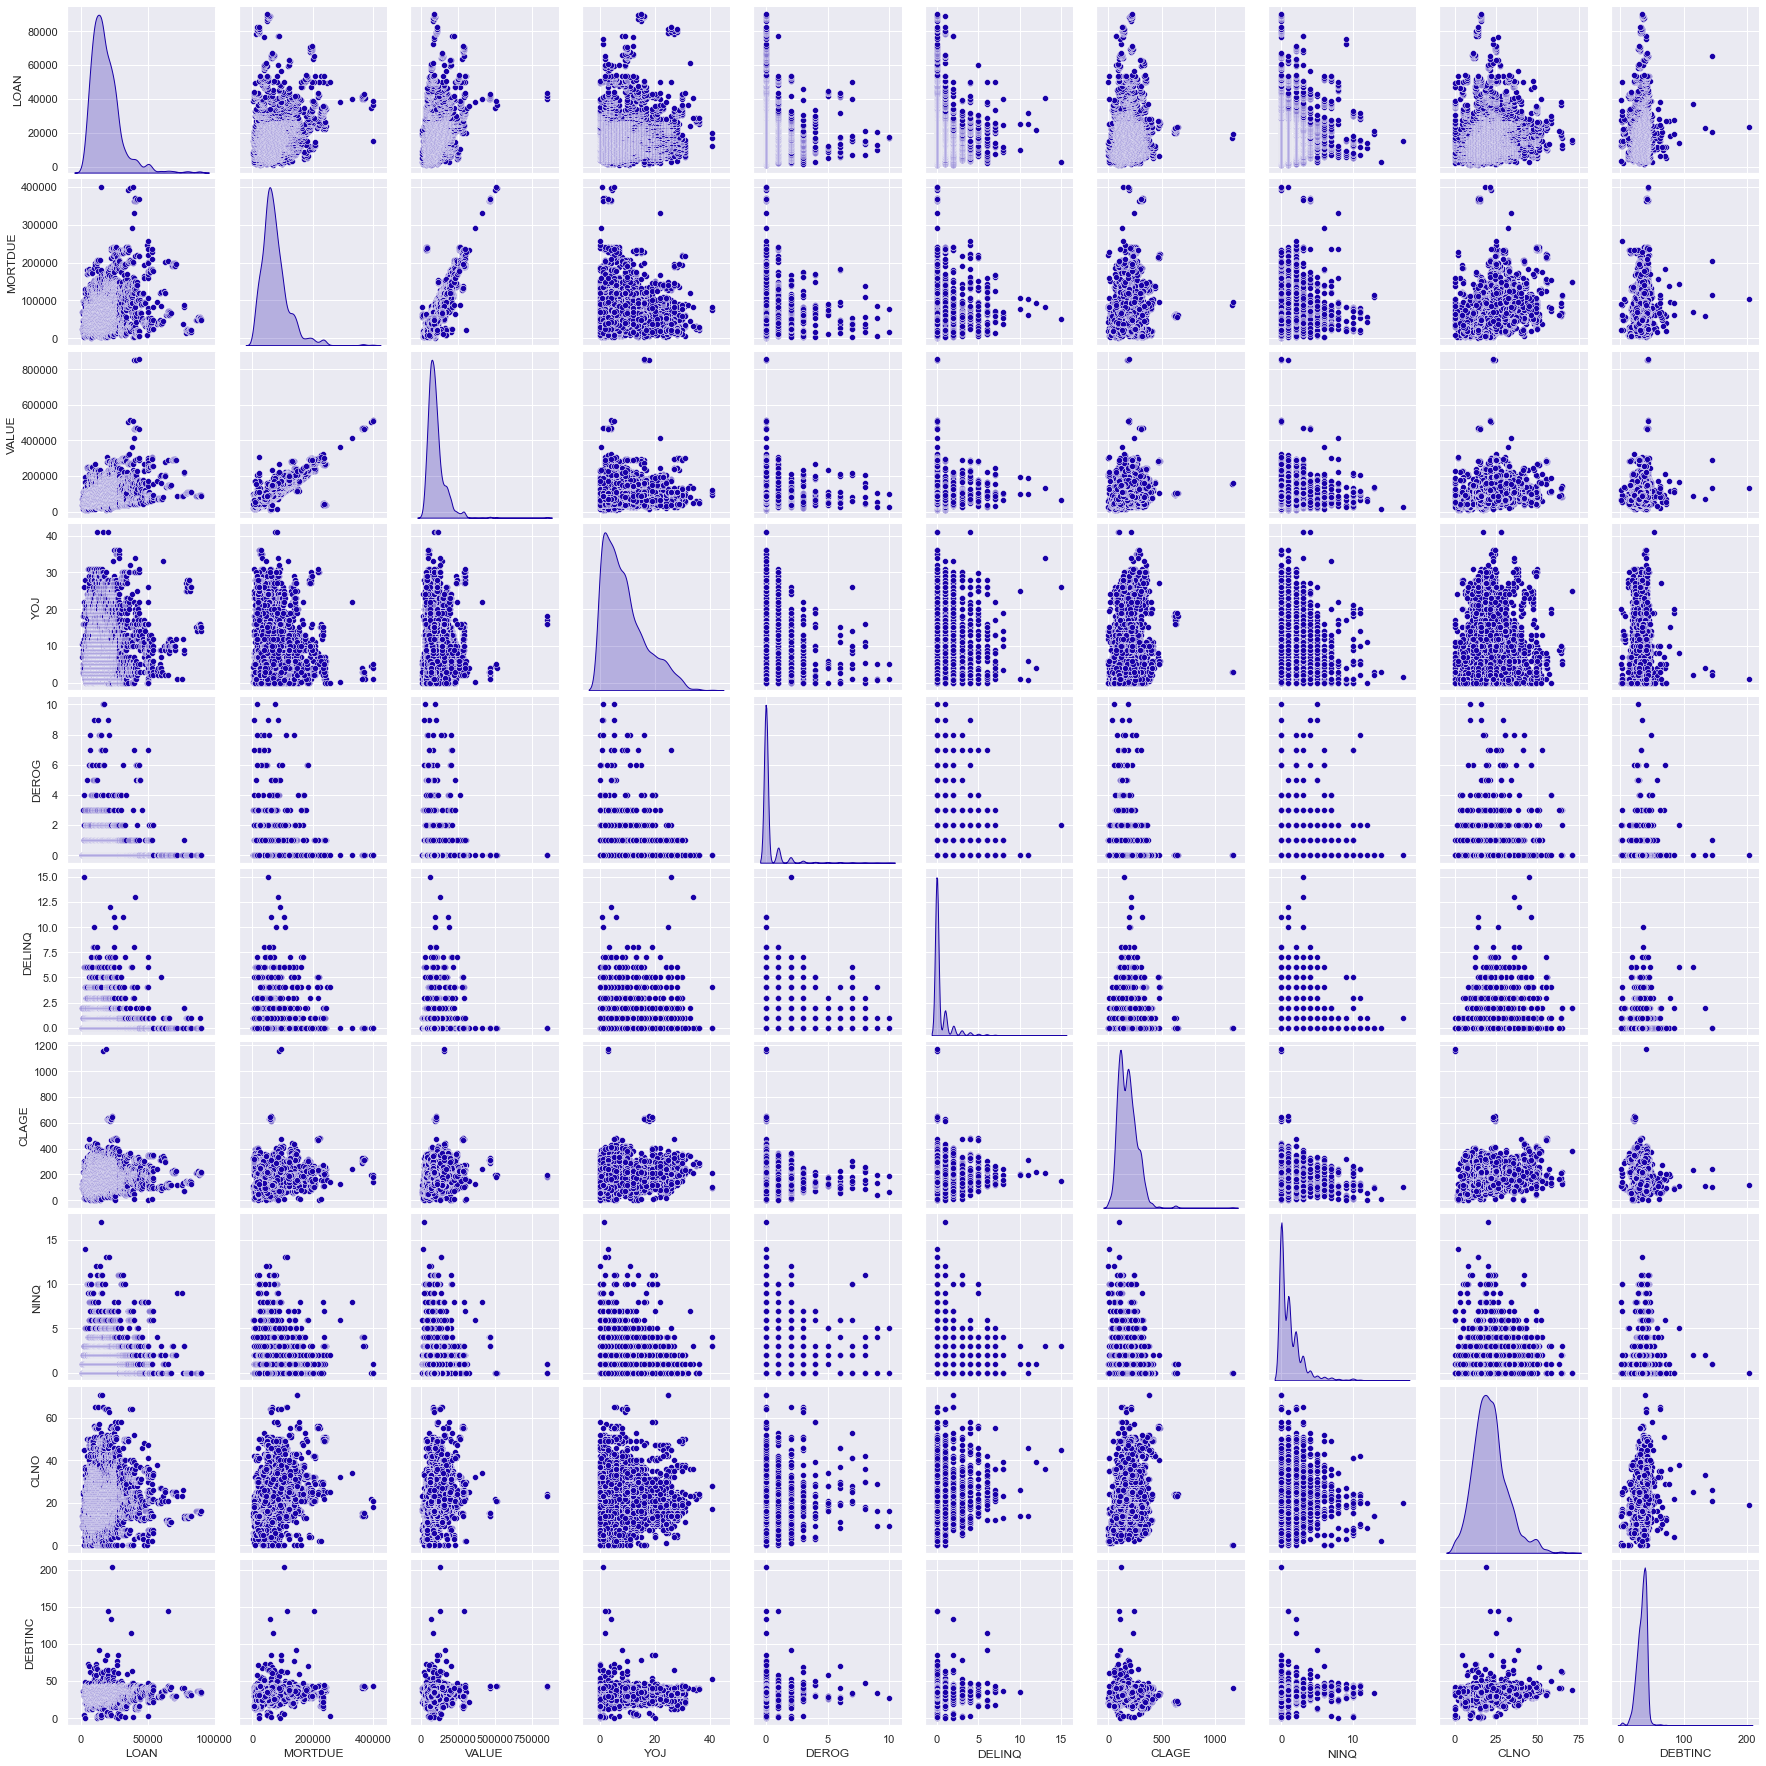

In [34]:
# Build pairplot for the data with hue = 'BAD'
# Remove ___________ and complete the code

sns.pairplot(data = df_copy[numerical_col], diag_kind = 'kde');

### **Think about it**
- Are there missing values and outliers in the dataset? If yes, how can you treat them? 
- Can you think of different ways in which this can be done and when to treat these outliers or not?
- Can we create new features based on Missing values?

#### Treating Outliers

In [35]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1=np.percentile(df[col],25) # 25th quantile
    Q3=np.percentile(df[col],75)  # 75th quantile
    IQR=Q3-Q1   # IQR Range
    Lower_Whisker = Q1 #define lower whisker
    Upper_Whisker = Q3  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [36]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


#### Adding new columns in the dataset for each column which has missing values 

In [37]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [38]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for column in missing_col:
    add_binary_flag(df,column)
    
missing_col

['MORTDUE',
 'VALUE',
 'REASON',
 'JOB',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

#### Filling missing values in numerical columns with median and mode in categorical variables

In [39]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
# cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')
cat_data = df.select_dtypes('object').columns.tolist()

# Fill numeric columns with median.
# Remove _________ and complete the code
for cols in num_data.columns:
    df[cols].replace(np.nan,num_data[cols].median(),inplace = True)

# Fill object columns with model
# Remove _________ and complete the code
for column in cat_data:
    mode = df[column].mode()[0]
    df[column].fillna(0,inplace = True)
    df[column].replace(0,mode,inplace = True)

df still contains objects

df_copy contains categories

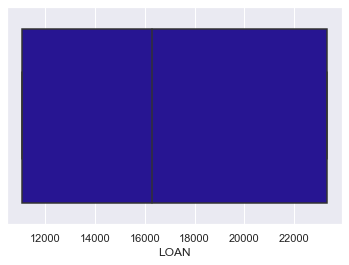

In [40]:
treat_outliers_all(df,numerical_col)
sns.boxplot(x = df.LOAN);

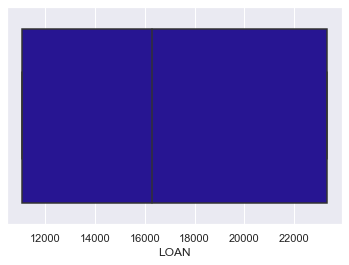

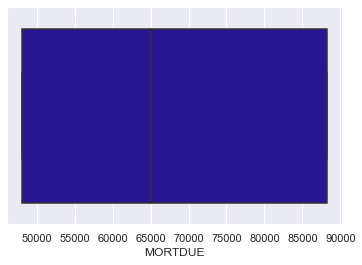

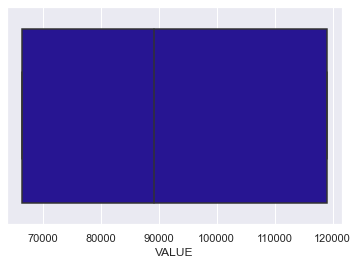

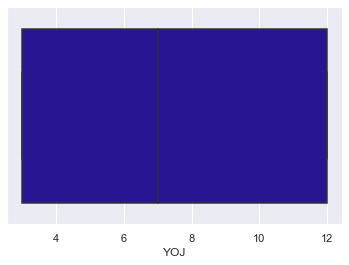

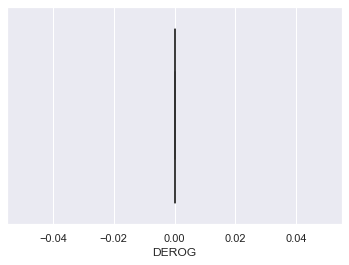

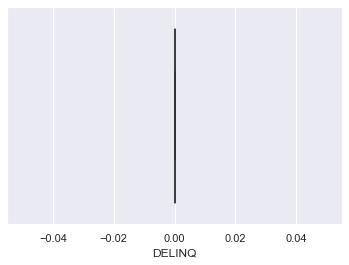

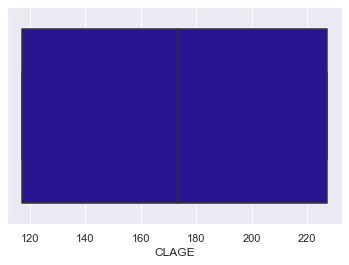

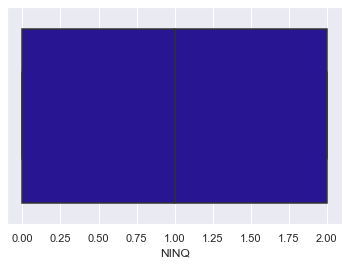

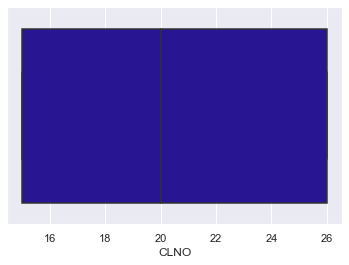

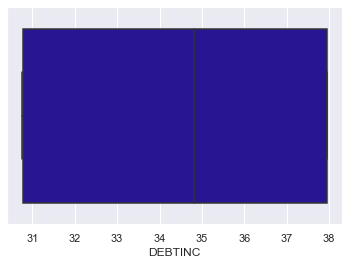

In [41]:
for column in numerical_col:
    sns.boxplot(x = df[column])
    plt.show()

In [42]:
df_copy

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [43]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,VALUE_missing_values_flag,REASON_missing_values_flag,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag
0,1,11100.0,48139.00,66489.5,HomeImp,Other,10.5,0.0,0.0,117.371430,...,False,False,False,False,False,False,False,False,False,True
1,1,11100.0,70053.00,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,...,False,False,False,False,False,False,False,False,False,True
2,1,11100.0,48139.00,66489.5,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,False,False,True
3,1,11100.0,65019.00,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,...,True,True,True,True,True,True,True,True,True,True
4,0,11100.0,88200.25,112000.0,HomeImp,Office,3.0,0.0,0.0,117.371430,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,23300.0,57264.00,90185.0,DebtCon,Other,12.0,0.0,0.0,221.808718,...,False,False,False,False,False,False,False,False,False,False
5956,0,23300.0,54576.00,92937.0,DebtCon,Other,12.0,0.0,0.0,208.692070,...,False,False,False,False,False,False,False,False,False,False
5957,0,23300.0,54045.00,92924.0,DebtCon,Other,12.0,0.0,0.0,212.279697,...,False,False,False,False,False,False,False,False,False,False
5958,0,23300.0,50370.00,91861.0,DebtCon,Other,12.0,0.0,0.0,213.892709,...,False,False,False,False,False,False,False,False,False,False


## **Proposed approach**
**1. Potential techniques** - What different techniques should be explored?

**2. Overall solution design** - What is the potential solution design?

**3. Measures of success** - What are the key measures of success?

# **Milestone 2**

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Data Preparation**

### **Separating the target variable from other variables**

In [44]:
import pandas as pd 

import numpy as np 

import seaborn as sns 

import matplotlib.pyplot as plt 

#import lda and qda 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#scaler library

from sklearn.preprocessing import StandardScaler

#Split training and test data 

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, cross_validate

#metrics

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

#get rid of warnings 

import warnings 
warnings.filterwarnings('ignore')

In [45]:
filepath1 = r'/Users/kylelacson/Documents/Coding/Great_Learning/Course Work /Projects/Capstone/Classification Capstone/capstone.csv'

filepath2 = r'/Users/kylelacson/Documents/Coding/Great_Learning/Course Work /Projects/Capstone/Classification Capstone/capstone_target.csv'

In [46]:
df = pd.read_csv(filepath1)
df_target = pd.read_csv(filepath2)

In [47]:
df.head()

,Unnamed: 0,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,VALUE_missing_values_flag,REASON_missing_values_flag,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag
0,0,11100.0,48139.00,66489.5,HomeImp,Other,10.5,0.0,0.0,117.371430,...,False,False,False,False,False,False,False,False,False,True
1,1,11100.0,70053.00,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,...,False,False,False,False,False,False,False,False,False,True
2,2,11100.0,48139.00,66489.5,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,False,False,True
3,3,11100.0,65019.00,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,...,True,True,True,True,True,True,True,True,True,True
4,4,11100.0,88200.25,112000.0,HomeImp,Office,3.0,0.0,0.0,117.371430,...,False,False,False,False,False,False,False,False,False,True


In [48]:
#dropping the 'flagged' columns 
df.drop(columns = df.iloc[:,13:], axis = 1, inplace = True)
df.drop(columns = 'Unnamed: 0', axis =1, inplace = True)

In [49]:
df.head()

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,11100.0,48139.00,66489.5,HomeImp,Other,10.5,0.0,0.0,117.371430,1.0,15.0,34.818262
1,11100.0,70053.00,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,0.0,15.0,34.818262
2,11100.0,48139.00,66489.5,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,15.0,34.818262
3,11100.0,65019.00,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,11100.0,88200.25,112000.0,HomeImp,Office,3.0,0.0,0.0,117.371430,0.0,15.0,34.818262


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LOAN     5960 non-null   float64
 1   MORTDUE  5960 non-null   float64
 2   VALUE    5960 non-null   float64
 3   REASON   5960 non-null   object 
 4   JOB      5960 non-null   object 
 5   YOJ      5960 non-null   float64
 6   DEROG    5960 non-null   float64
 7   DELINQ   5960 non-null   float64
 8   CLAGE    5960 non-null   float64
 9   NINQ     5960 non-null   float64
 10  CLNO     5960 non-null   float64
 11  DEBTINC  5960 non-null   float64
dtypes: float64(10), object(2)
memory usage: 558.9+ KB


Dataset is complete and there are no null values, we may need to deal with the outliers.

In [51]:
#seperating the columns by numbers and objects
numerical_col = df.select_dtypes(include = np.number)
numerical_col_copy = numerical_col.copy()

categorical_col = df.select_dtypes(include = object)
categorical_col_copy = categorical_col.copy()

In [52]:
#standardize the the data using standard scaler
scaler = StandardScaler()

numerical_col_copy = pd.DataFrame(data = scaler.fit_transform(numerical_col), columns = numerical_col.columns)

In [53]:
#the REASON column only has two columns, lets map the functions HomeImp = 0 and DebtCon = 1 
reason_map = {'HomeImp' : 0,
             'DebtCon' : 1}

categorical_col.replace(reason_map,inplace = True)
categorical_col

,REASON,JOB
0,0,Other
1,0,Other
2,0,Other
3,1,Other
4,0,Office
...,...,...
5955,1,Other
5956,1,Other
5957,1,Other
5958,1,Other


In [54]:
df_test = pd.concat([numerical_col_copy,categorical_col], axis = 1)

In [55]:
#df_test contains normalized dataset 
df_test = pd.get_dummies(data = df_test, columns = ['JOB'], drop_first = True)

#reminder that the job options are Other, Office, Sales, Mgr, ProfExe, and Self

In [56]:
#setting the x features and y target variables
X = df_test
y = df_target.drop(columns = 'Unnamed: 0', axis = 1) # 0 : loan repaid , 1 : defaulted on loan

### Lets try train_test_split with LDA ###

In [57]:
#model_selection train_test_split the data 
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 1)

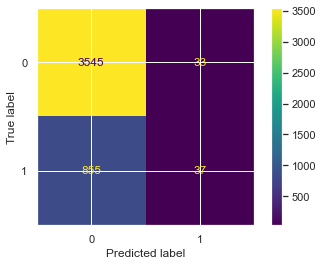

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      3578
           1       0.53      0.04      0.08       892

    accuracy                           0.80      4470
   macro avg       0.67      0.52      0.48      4470
weighted avg       0.75      0.80      0.73      4470

Training Score (train_test_split): 0.801


In [58]:
#initialize the LDA
lda = LinearDiscriminantAnalysis().fit(X_train,y_train)
y_train_pred = lda.predict(X_train)
round(lda.score(X_train,y_train),4)

cm_train = confusion_matrix(y_train,y_train_pred)

disp = ConfusionMatrixDisplay(cm_train)

disp.plot()

plt.show()

#classification report on training data
print(classification_report(y_train,y_train_pred))

tts_training_score = round(lda.score(X_train,y_train),3)

print(f'Training Score (train_test_split): {tts_training_score}')

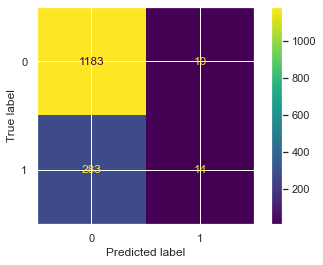

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1193
           1       0.58      0.05      0.09       297

    accuracy                           0.80      1490
   macro avg       0.70      0.52      0.49      1490
weighted avg       0.76      0.80      0.73      1490

Test score (train_test_split): 0.8034


In [59]:
#test data
y_test_pred = lda.predict(X_test)

cm_train = confusion_matrix(y_test,y_test_pred)

disp = ConfusionMatrixDisplay(cm_train)

disp.plot()

plt.show()

#classification report on the test data
print(classification_report(y_test,y_test_pred))

tts_test_score = round(lda.score(X_test,y_test),4)

print(f'Test score (train_test_split): {tts_test_score}')

### Trying LDA with cross-validation (k-folds)

In [60]:
#trying other methods of cross validation other then train_test_split 

#trying to implement cross_validate 

#re-initializing the linear discriminant analysis function 

lda = LinearDiscriminantAnalysis(solver = 'svd').fit(X_train,y_train)

#kfolds = 10 times
cv = cross_validate(estimator = lda, X = X,y = y, cv = 10, return_train_score = True)

cross_validate_train = round(cv['train_score'].mean(),3)

print(f'Train score (kfolds): {cross_validate_train}')

cross_validate_test = round(cv['test_score'].mean(),3)

print(f'Test score (kfolds): {cross_validate_test}')

Train score (kfolds): 0.803
Test score (kfolds): 0.795


### Lets try applying Quadtratic Discriminant Analysis ###

In [61]:
#train_test_split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 2, stratify = y)

In [62]:
#initializing the QDA estimator 
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train,y_train)

QuadraticDiscriminantAnalysis()

Training score: 0.5098
Test score: 0.5007


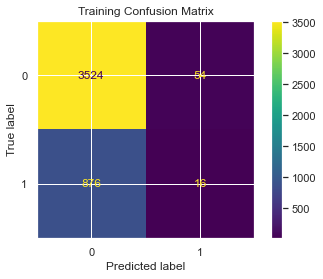

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      3578
           1       0.23      0.02      0.03       892

    accuracy                           0.79      4470
   macro avg       0.51      0.50      0.46      4470
weighted avg       0.69      0.79      0.71      4470



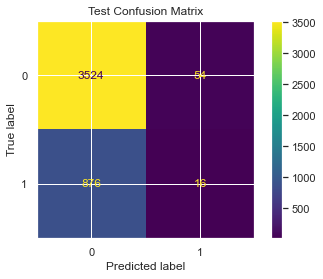

              precision    recall  f1-score   support

           0       0.83      0.48      0.60      1193
           1       0.22      0.60      0.32       297

    accuracy                           0.50      1490
   macro avg       0.52      0.54      0.46      1490
weighted avg       0.71      0.50      0.55      1490



In [63]:
#apply qda to determine results with test data
y_training_pred = qda.predict(X_train)
print(f'Training score: {round(qda.score(X_train,y_train),4)}')

y_test_pred = qda.predict(X_test)
print(f'Test score: {round(qda.score(X_test,y_test),4)}')

#train confusion matrix 
cm = confusion_matrix(y_train,y_train_pred)

disp = ConfusionMatrixDisplay(cm)

disp.plot()

plt.title('Training Confusion Matrix')
plt.show()

print(classification_report(y_train,y_train_pred))

#Test data 

cm_test = confusion_matrix(y_test,y_test_pred)

disp_test = ConfusionMatrixDisplay(cm_test)

disp.plot()

plt.title('Test Confusion Matrix')

plt.show()

print(classification_report(y_test,y_test_pred))

### Lets try to use some other cross-validation technique such as kfolds ###

In [64]:
#k-folds technique 
cross_valid = cross_validate(estimator = qda, X = X, y = y, cv = 10, return_train_score = True)

cross_valid.keys()

cv_train_score = round(cross_valid['train_score'].mean(),3)

print(f'Training score (cross validation - kfolds): {cv_train_score}')

cv_test_score = round(cross_valid['test_score'].mean(),3)

print(f'Testing score (cross validation - kfolds): {cv_test_score}')

Training score (cross validation - kfolds): 0.424
Testing score (cross validation - kfolds): 0.433


### **Splitting the data into 70% train and 30% test set**

In [65]:
# Split the data into training and test set
# Remove _________ and complete the code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify = y)

#can use the stratify arguement to make the split more balanced, this will split the data with evenly distributed weights 

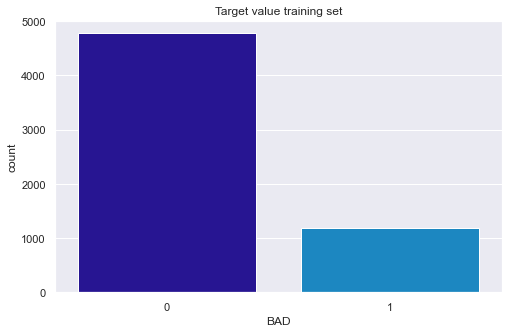

In [66]:
#compare the target value outputs, there seems to be quite a bit of biased 

plt.figure(figsize = (8,5))
sns.countplot(y.BAD)
plt.title('Target value training set');

#target values are unevenly distributed, startify can be used

### **Think about it** 
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?
- If the data is imbalanced, can you make the split more balanced and if yes, how?

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [67]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model** 

In [68]:
# Defining the Logistic regression model
# Remove _________ and complete the code
log_reg = LogisticRegression(random_state = 1, class_weight = 'balanced')

# Fitting the model on the training data 
# Remove _________ and complete the code
log_reg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', random_state=1)

#### Checking the performance on the train dataset

In [69]:
#Predict for train set
# Remove _________ and complete the code
training_prediction = pd.Series(log_reg.predict(X_train))

#checking the performance on the train dataset
# Remove _________ and complete the code
print(f'The accuracy of this model is approximatley {round(log_reg.score(X_train,y_train)*100,3)}%.')

The accuracy of this model is approximatley 65.268%.


#### Checking the performance on the test dataset

In [70]:
#Predict for test set
# Remove _________ and complete the code
test_prediction = log_reg.predict(X_test)

#checking the performance on the test dataset
# Remove _________ and complete the code
print(f'The accuracy of the test set for this model is approximatley {round(log_reg.score(X_test,y_test)*100,3)}%')

The accuracy of the test set for this model is approximatley 65.716%


**Observations: __________**

-Training the model with training data, we only are able to correctly calssify with about 65% accuracy

-This could be the imbalance of the the target variable or the threshold of the model is no sufficient 

-The training and the testing models perform similarly in both predicted cases

-The logistic Regression is lacking overall

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [71]:
# Printing the coefficients of logistic regression
# Remove _________ and complete the code

#include the coefficients here 
log_coef = np.array(np.round(log_reg.coef_, decimals = 3))
dictionary_bank = {}

for ix,i in enumerate(X.columns):
    dictionary_bank[i] = log_coef[0][ix]    

# print(dictionary_bank)

In [72]:
pd.Series(data = dictionary_bank)

LOAN          -0.206
MORTDUE       -0.253
VALUE          0.138
YOJ           -0.080
DEROG          0.000
DELINQ         0.000
CLAGE         -0.437
NINQ           0.289
CLNO           0.059
DEBTINC        0.286
REASON        -0.224
JOB_Office    -0.665
JOB_Other     -0.087
JOB_ProfExe   -0.115
JOB_Sales      0.773
JOB_Self       0.455
dtype: float64

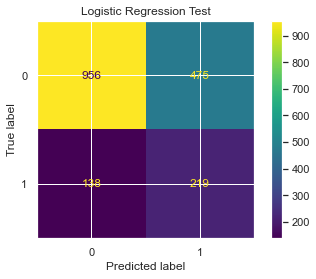

              precision    recall  f1-score   support

           0       0.87      0.67      0.76      1431
           1       0.32      0.61      0.42       357

    accuracy                           0.66      1788
   macro avg       0.59      0.64      0.59      1788
weighted avg       0.76      0.66      0.69      1788



In [73]:
#printing the confusion matrix to determine how the model performed on the testing data set

cm = confusion_matrix(y_test,test_prediction)

disp = ConfusionMatrixDisplay(cm)

disp.plot()

plt.title('Logistic Regression Test')

plt.show()

print(classification_report(y_test,test_prediction))

**Insights ________**

-The recall of the data is relativly average for both positive and negative results

-Precision imbalance between the two, identifying more false positives...

-Logistic regression accuracy falls short, the macro average is very low 

-Weight average shows heavy imbalance of data

-This could be a result of bias within the data or the model target variable is unbalanced and needs weight

-The threshold can be adjusted to make it less sensative to false negatives

### **Think about it:**
- The above Logistic regression model was build on the threshold of 0.5, can we use different threshold?
- How to get an optimal threshold and which curve will help you achieve?
- How does, accuracy, precision and recall change on the threshold?

### **Build a Decision Tree Model**

### **Think about it:**
- In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not? If not, why?

In [74]:
df

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,11100.0,48139.00,66489.5,HomeImp,Other,10.5,0.0,0.0,117.371430,1.0,15.0,34.818262
1,11100.0,70053.00,68400.0,HomeImp,Other,7.0,0.0,0.0,121.833333,0.0,15.0,34.818262
2,11100.0,48139.00,66489.5,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,15.0,34.818262
3,11100.0,65019.00,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,11100.0,88200.25,112000.0,HomeImp,Office,3.0,0.0,0.0,117.371430,0.0,15.0,34.818262
...,...,...,...,...,...,...,...,...,...,...,...,...
5955,23300.0,57264.00,90185.0,DebtCon,Other,12.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,23300.0,54576.00,92937.0,DebtCon,Other,12.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,23300.0,54045.00,92924.0,DebtCon,Other,12.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,23300.0,50370.00,91861.0,DebtCon,Other,12.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [75]:
df = pd.get_dummies(data = df, drop_first = True)

In [76]:
df

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,11100.0,48139.00,66489.5,10.5,0.0,0.0,117.371430,1.0,15.0,34.818262,1,0,1,0,0,0
1,11100.0,70053.00,68400.0,7.0,0.0,0.0,121.833333,0.0,15.0,34.818262,1,0,1,0,0,0
2,11100.0,48139.00,66489.5,4.0,0.0,0.0,149.466667,1.0,15.0,34.818262,1,0,1,0,0,0
3,11100.0,65019.00,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,0,0,1,0,0,0
4,11100.0,88200.25,112000.0,3.0,0.0,0.0,117.371430,0.0,15.0,34.818262,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,23300.0,57264.00,90185.0,12.0,0.0,0.0,221.808718,0.0,16.0,36.112347,0,0,1,0,0,0
5956,23300.0,54576.00,92937.0,12.0,0.0,0.0,208.692070,0.0,15.0,35.859971,0,0,1,0,0,0
5957,23300.0,54045.00,92924.0,12.0,0.0,0.0,212.279697,0.0,15.0,35.556590,0,0,1,0,0,0
5958,23300.0,50370.00,91861.0,12.0,0.0,0.0,213.892709,0.0,16.0,34.340882,0,0,1,0,0,0


#### Split the data

In [77]:
# Split the data into training and test set
# Remove _________ and complete the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

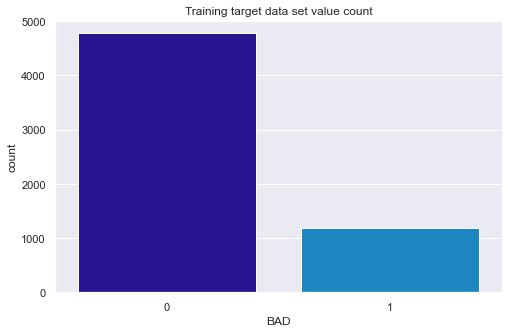

In [78]:
plt.figure(figsize = (8,5))
sns.countplot(y.BAD)
plt.title('Training target data set value count');

In [79]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
# Remove ___________ and complete the code

dtree = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 2)

In [80]:
#determining hte best class_weight to include in the decision tree class_weight
round(y.value_counts()[1]/(y.value_counts()[0]+y.value_counts()[1]),2)

0.2

In [81]:
#fitting Decision tree model
# Remove ___________ and complete the code
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=2)

#### Checking the performance on the train dataset

In [82]:
# Checking performance on the training data
# Remove ___________ and complete the code
y_predictor = dtree.predict(X_train)
print(f'The accuracy of the model on the training data is {round(dtree.score(X_train, y_train)*100,3)}%')

The accuracy of the model on the training data is 99.874%


#### Checking the performance on the test dataset

In [83]:
# Checking performance on the testing data
# Remove _________ and complete the code
ytest_predictor = dtree.predict(X_test)
print(f'The accuracy of the the model on the test data is {round(dtree.score(X_test,y_test)*100,2)}%')

The accuracy of the the model on the test data is 84.48%


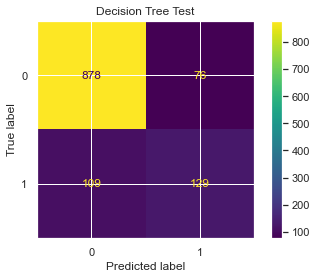

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       954
           1       0.63      0.54      0.58       238

    accuracy                           0.84      1192
   macro avg       0.76      0.73      0.74      1192
weighted avg       0.84      0.84      0.84      1192



In [84]:
cm = confusion_matrix(y_test,ytest_predictor)

disp = ConfusionMatrixDisplay(cm)

disp.plot()

plt.title('Decision Tree Test')

plt.show()

print(classification_report(y_test,ytest_predictor))



**Insights _____________**
-The overall accuracy of our decision tree fares well

-The f1-scores are acceptable and can be determined that the model has a representative description of the data

-Predicting the negative case (1) is having some problems

-Accuracy is relativly good, the model is able to classify and avoid type 1 and type 2 errors almost 90% of the time

-Macro average is better, more balanced data set along with fair f-1 scores

-Further testing of the class_weights may be needed to further improve the model 

### **Think about it:**
- Can we improve this model? 
- How to get optimal parameters in order to get the best possible results?

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [85]:
# Choose the type of classifier. 
# Remove _________ and complete the code
dtree_class = DecisionTreeClassifier(class_weight = {0 : 0.20, 1 : 0.8}, random_state = 1)

# Grid of parameters to choose from
# Remove _________ and complete the code
parameters = {'criterion' : ['gini','entropy'],
              'max_features' : np.arange(1,8),
             'max_depth' : np.arange(2,8)}


# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
score = 'accuracy'

# Run the grid search
# Remove _________ and complete the code
gridCV = GridSearchCV(estimator = dtree_class, scoring = score, param_grid = parameters, cv = 8)

# Fit the GridSearch on train dataset
# Remove _________ and complete the code
gridCV.fit(X_train,y_train)

# Set the clf to the best combination of parameters
# Remove _________ and complete the code
dtree_class = gridCV.best_estimator_


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
dtree_class.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=2,
                       max_features=7, random_state=1)

#### Checking the performance on the train dataset

In [86]:
# Checking performance on the training data based on the tuned model
# Remove _________ and complete the code
dtree_ytrain = dtree_class.predict(X_train)

print(classification_report(y_train,dtree_ytrain))
print(confusion_matrix(y_train,dtree_ytrain))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3817
           1       0.62      0.67      0.64       951

    accuracy                           0.85      4768
   macro avg       0.77      0.78      0.77      4768
weighted avg       0.86      0.85      0.85      4768

[[3426  391]
 [ 318  633]]


#### Checking the performance on the test dataset

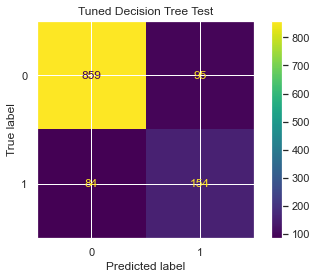

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       954
           1       0.62      0.65      0.63       238

    accuracy                           0.85      1192
   macro avg       0.76      0.77      0.77      1192
weighted avg       0.85      0.85      0.85      1192



In [87]:
# Checking performance on the testing data based on the tuned model
# Remove _________ and complete the code
dtree_ytest = dtree_class.predict(X_test)

cm = confusion_matrix(y_test,dtree_ytest)

disp = ConfusionMatrixDisplay(cm)

disp.plot() 

plt.title('Tuned Decision Tree Test')

plt.show()

print(classification_report(y_test,dtree_ytest))


**Insights ___________**

-This model performed slightly better then the non-tuned version!

-Further exploration may provide better results

-Macro average and weighted average fair pretty well

-Solid model for identifying and classifying with minimal errors

#### Plotting the Decision Tree

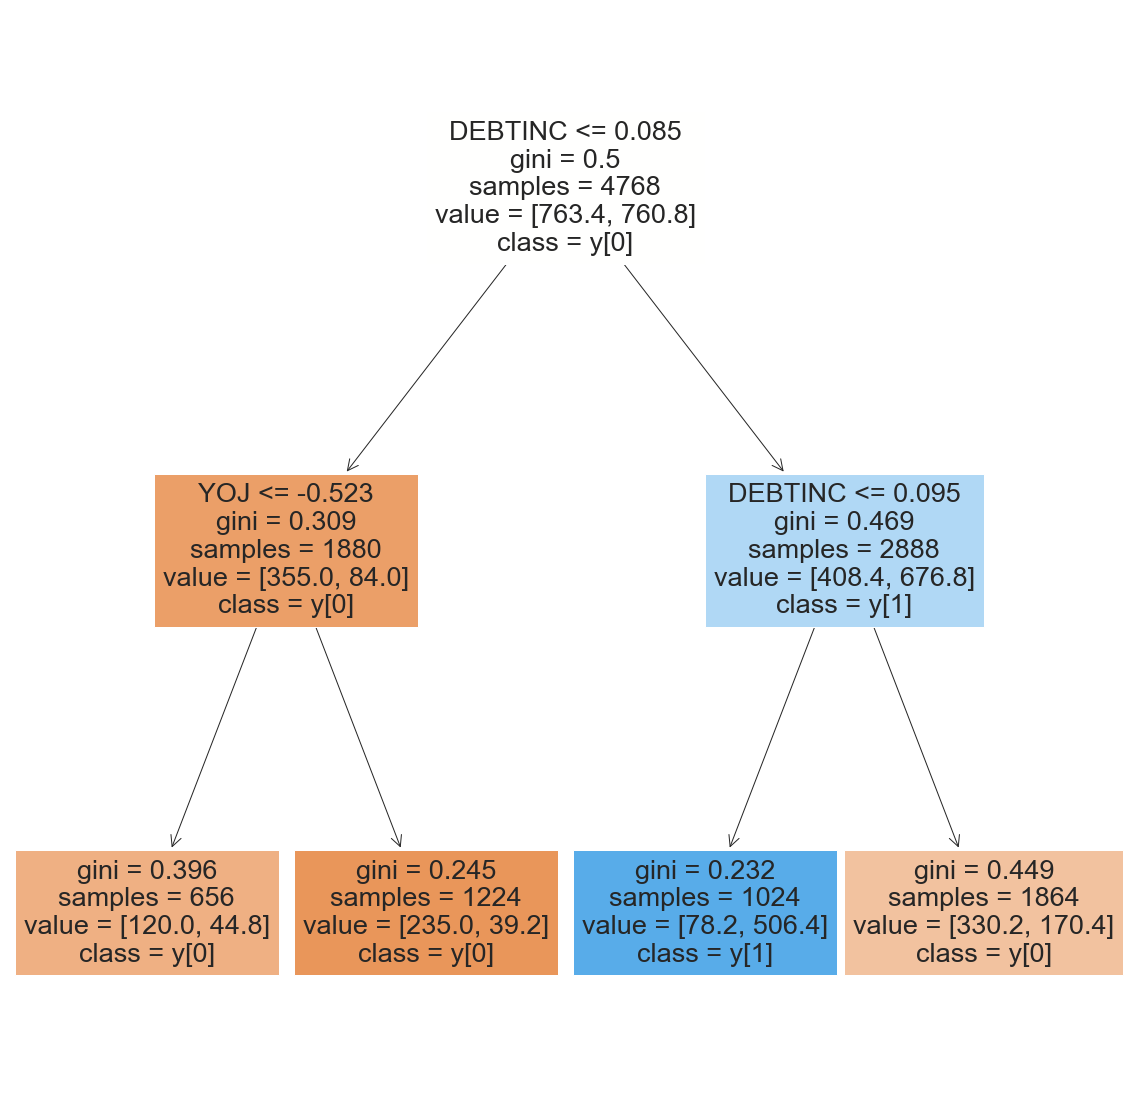

In [88]:
# Plot the decision  tree and analyze it to build the decision rule
# Remove _________ and complete the code
plt.figure(figsize = (20,20))
features = list(X.columns)
tree.plot_tree(dtree_class,feature_names = features, max_depth = 4, filled = True, class_names = True)
plt.show()

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [89]:
# Defining Random forest CLassifier
# Remove _________ and complete the code
rf_class = RandomForestClassifier(random_state = 1)
rf_class.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

#### Checking the performance on the train dataset

In [90]:
#Checking performance on the training data
# Remove _________ and complete the code
ytrain_pred = rf_class.predict(X_train)

print(classification_report(y_train,ytrain_pred))
print(confusion_matrix(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3817
           1       1.00      1.00      1.00       951

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768

[[3813    4]
 [   2  949]]


#### Checking the performance on the test dataset

In [91]:
# Checking performance on the test data
# Remove _________ and complete the code
ytest_pred = rf_class.predict(X_test)

print(classification_report(y_test,ytest_pred))
print(confusion_matrix(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       954
           1       0.75      0.54      0.63       238

    accuracy                           0.87      1192
   macro avg       0.82      0.75      0.78      1192
weighted avg       0.86      0.87      0.86      1192

[[911  43]
 [109 129]]


**Observations: __________**

-The random forest on the test data performs relativley better than the decision tree classifier

-The overall accuracy of this model is close to 90%

-The precision and recall for this binary classfication is slightly better within the recall which might be the deciding vote

-Slight edge in accuracy

### **Build a Random Forest model with Class Weights**

In [92]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

# Remove _________ and complete the code
rf_class2 = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 2)
# Fitting Random Forest model
# Remove _________ and complete the code
rf_class2.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=2)

#### Checking the performance on the train dataset

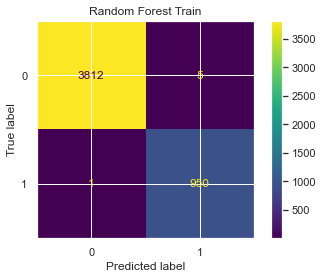

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3817
           1       0.99      1.00      1.00       951

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



In [93]:
# Checking performance on the train data
# Remove _________ and complete the code
ytrain_pred = rf_class2.predict(X_train)

cm = confusion_matrix(y_train,ytrain_pred)

disp = ConfusionMatrixDisplay(cm)

disp.plot()

plt.title('Random Forest Train')

plt.show()

print(classification_report(y_train,ytrain_pred))

#### Checking the performance on the test dataset

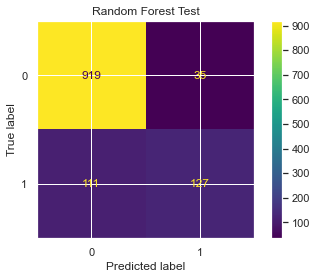

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       954
           1       0.78      0.53      0.64       238

    accuracy                           0.88      1192
   macro avg       0.84      0.75      0.78      1192
weighted avg       0.87      0.88      0.87      1192



In [94]:
# Checking performance on the test data
# Remove _________ and complete the code
ytest_pred = rf_class2.predict(X_test)

cm = confusion_matrix(y_test,ytest_pred)

disp = ConfusionMatrixDisplay(cm)

disp.plot()

plt.title('Random Forest Test')

plt.show()

print(classification_report(y_test,ytest_pred))

### **Think about it:**
- Can we try different weights?
- If yes, should we increase or decrease class weights for different classes? 

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [95]:
import timeit
#next portion takes approximetley 130 seconds ~

In [96]:
start = timeit.default_timer()
# Choose the type of classifier. 
# Remove _________ and complete the code
rf_class_weight = RandomForestClassifier(class_weight = {0: 0.20, 1: 0.80}, random_state = 3)


# Grid of parameters to choose from
# Remove _________ and complete the code
parameters = {'criterion' : ['gini','entropy','log_loss'],
              'max_depth' : np.arange(2,8),
              'n_estimators' : np.arange(50,200,50),
              'max_features' : ['sqrt','log2']}


# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
score = 'accuracy'

# Run the grid search
# Remove _________ and complete the code
rf_gridsearch = GridSearchCV(estimator = rf_class_weight, param_grid = parameters, scoring = score, cv = 8)
#fit the GridSearch on train dataset
# Remove _________ and complete the code
rf_gridsearch.fit(X_train,y_train)

# Set the clf to the best combination of parameters
# Remove _________ and complete the code
rf_gridsearch = rf_gridsearch.best_estimator_

# Fit the best algorithm to the data. 
# Remove _________ and complete the code
rf_gridsearch.fit(X_train, y_train)

stop = timeit.default_timer()

print('Time: ', stop-start)

Time:  137.99316104099998


#### Checking the performance on the train dataset

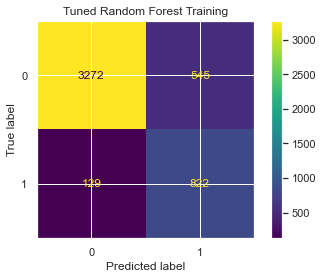

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3817
           1       0.60      0.86      0.71       951

    accuracy                           0.86      4768
   macro avg       0.78      0.86      0.81      4768
weighted avg       0.89      0.86      0.87      4768



In [97]:
# Checking performance on the training data
# Remove _________ and complete the code
ytrain_prediction = rf_gridsearch.predict(X_train)

cm = confusion_matrix(y_train,ytrain_prediction)

disp = ConfusionMatrixDisplay(cm)

disp.plot()

plt.title('Tuned Random Forest Training')

plt.show()

print(classification_report(y_train,ytrain_prediction))

#### Checking the performance on the test dataset

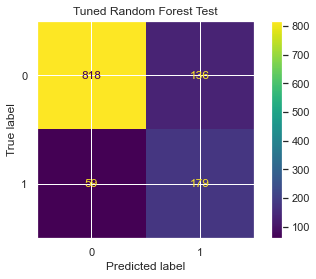

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       954
           1       0.57      0.75      0.65       238

    accuracy                           0.84      1192
   macro avg       0.75      0.80      0.77      1192
weighted avg       0.86      0.84      0.84      1192



In [98]:
# Checking performace on test dataset
# Remove _________ and complete the code
ytest_prediction = rf_gridsearch.predict(X_test)

cm = confusion_matrix(y_test,ytest_prediction)

disp = ConfusionMatrixDisplay(cm)

disp.plot()

plt.title('Tuned Random Forest Test')

plt.show()

print(classification_report(y_test,ytest_prediction))

**Insights: _____**

-The model itelf is good but does not outperform the original random forest classifier if we look at the call and accuracy

-More work on the parameters is needed to find a better model

#### Plot the Feature importance of the tuned Random Forest

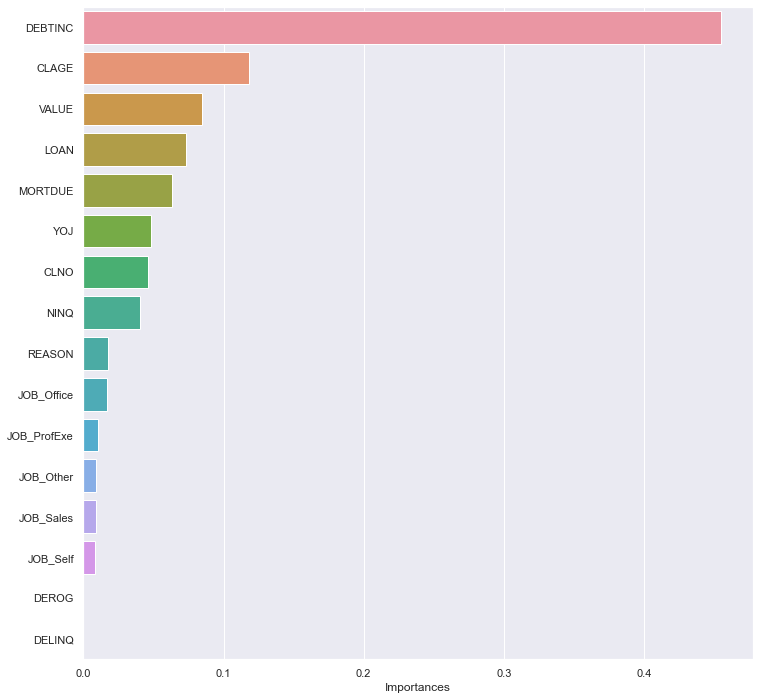

In [99]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
# Remove _________ and complete the code
importances = rf_gridsearch.feature_importances_

columns = X.columns

feature_importances = pd.DataFrame(data = importances, index = columns, columns = ['Importances']).sort_values('Importances', ascending = False)

plt.figure(figsize = (12,12))

feature_importances

sns.barplot(x = feature_importances.Importances,y = feature_importances.index);

### **Think about it:**
- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest 
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).
- Can we also perform feature engineering and create model features and build a more robust and accurate model for this problem statement? 

### **Comparing Model Performances**

In [100]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [101]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [102]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [103]:
# Make the list of all the model names 

models = [log_reg,dtree,dtree_class,rf_class2, rf_gridsearch,lda,qda]
# Remove _________ and complete the code

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [104]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]
# Remove _________ and complete the code

comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest','LDA','QDA'],
                    'Train_Accuracy': acc_train,
                    'Test_Accuracy': acc_test,
                    'Train_Recall': recall_train,
                    'Test_Recall': recall_test,
                    'Train_Precision': precision_train,
                    'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.653523,0.656040,0.639327,0.651261,0.317162,0.321577
1,Decision Tree,0.998742,0.844799,1.000000,0.542017,0.993730,0.629268
2,Tuned Decision Tree,0.851300,0.849832,0.665615,0.647059,0.618164,0.618474
3,Random Forest,0.998742,0.877517,0.998948,0.533613,0.994764,0.783951
4,Tuned Random Forest,0.858641,0.836409,0.864353,0.752101,0.601317,0.568254
5,LDA,0.801594,0.802852,0.042061,0.046218,0.533333,0.578947
6,QDA,0.506292,0.512584,0.636172,0.630252,0.231535,0.233281


**Insights: ________**

-The tuned models that utilized the gridsearchcv function to input specific hyperparameters performed worse than they're non-tuned counterparts

-Overall the Random Forest classification algorithm performed the best out of all the other models

-Depedning on whether you are prioritizing minimizing FN or maximizing FP, each model may be used in specific situations based on the test recall and precision values

-The GridSearchCV is a good way to search and specify hyperparameters

-I would recommend using a random forest the test data set as it performed the best out of all of the other classification algo's

-If you are looking to minimize the number of false negatives, maximizing the recall value may be optimal, therefore the tuned random forest may be your best bet!

**1. Refined insights -** What are the most meaningful insights from the data relevant to the problem?

**2. Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**3. Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?

In [105]:
def highlight(dataframe):
    return 'background-color: yellow'

comparison_frame = comparison_frame.style.applymap(highlight, ['Test_Accuracy'])
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.653523,0.656040,0.639327,0.651261,0.317162,0.321577
1,Decision Tree,0.998742,0.844799,1.000000,0.542017,0.993730,0.629268
2,Tuned Decision Tree,0.851300,0.849832,0.665615,0.647059,0.618164,0.618474
3,Random Forest,0.998742,0.877517,0.998948,0.533613,0.994764,0.783951
4,Tuned Random Forest,0.858641,0.836409,0.864353,0.752101,0.601317,0.568254
5,LDA,0.801594,0.802852,0.042061,0.046218,0.533333,0.578947
6,QDA,0.506292,0.512584,0.636172,0.630252,0.231535,0.233281
